# A. Exploratory Data Analysis  
Data Preprocessing
1. Download the data.
2. Analyze the data. 
3. Grenerate conclusions and obesrvations 




## Downloading the data 

dataset : https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [1]:

import os 
from google.colab import files

In [2]:

####################### Uploading the kaggle API key ###################

files.upload() #this will prompt you to update the json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

Saving kaggle.json to kaggle.json
kaggle.json


In [3]:
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

  0% 0.00/227k [00:00<?, ?B/s]
100% 227k/227k [00:00<00:00, 33.8MB/s]


In [4]:
!unzip /content/vehicle-dataset-from-cardekho.zip

Archive:  /content/vehicle-dataset-from-cardekho.zip
  inflating: CAR DETAILS FROM CAR DEKHO.csv  
  inflating: Car details v3.csv      
  inflating: car data.csv            


## Data Wrangling

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv("/content/car data.csv")

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Check for NULL values 

In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Catagorical values 

In [11]:
print(df["Fuel_Type"].unique())
print(df["Seller_Type"].unique())
print(df["Owner"].unique())
print(df["Transmission"].unique())
# print(df["Year"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
[0 1 3]
['Manual' 'Automatic']


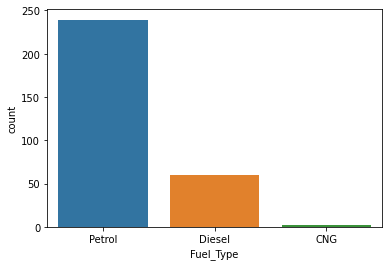

In [12]:
sns.countplot("Fuel_Type", data = df )

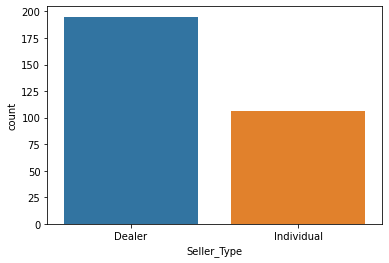

In [13]:
sns.countplot("Seller_Type", data = df )

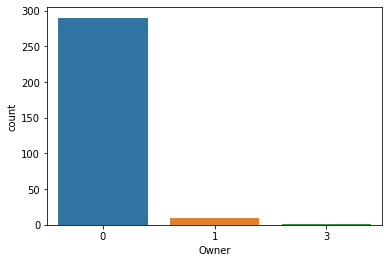

In [14]:
sns.countplot("Owner", data = df )

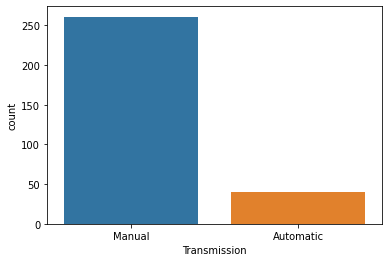

In [15]:
sns.countplot("Transmission", data = df )

### Numerical Values

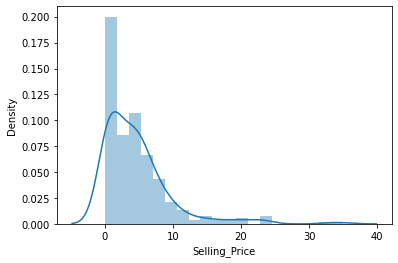

In [16]:
sns.distplot(df["Selling_Price"], bins = 20 )

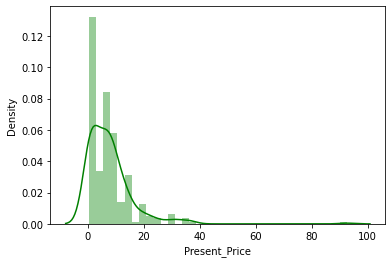

In [17]:
sns.distplot(df["Present_Price"], color= "g")

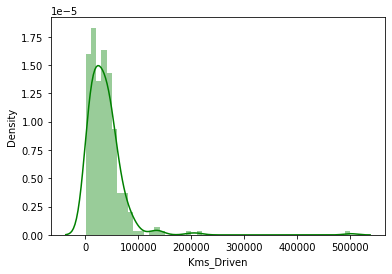

In [18]:
sns.distplot(df["Kms_Driven"], color= "g")

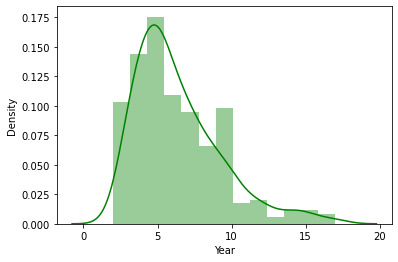

In [20]:
years_uesd = 2020 - df["Year"]  # since the dataset contains current price of year 2020
sns.distplot( years_uesd , color= "g")

## Conclusions : 

1. The dataset contains no missing values
2. Fuel_Type, Seller_Type, Transmission, and Owner are categorical features
    - We need to encode it in order to use it for model training
3. Year, Selling_Price, Present_Price, and Kms_Driven are numerical features
    - They have different scales we may need to standardize/Normalize them depending upon the model's requirement

    - "Years" can be converted into years_used in order to use features in a better way
  
4. Car Name can be removed as it does not impact the car price. ( Company name may have different observations but is not included in the dataset )

# B.Feature Engineering and feature selection 

In [29]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [30]:
df["Years_used"] = 2020 - df["Year"]

In [31]:
df.drop("Car_Name", axis = 1 , inplace= True)
df.drop("Year", axis = 1 , inplace= True)

In [32]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_used
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


## Corrilation 

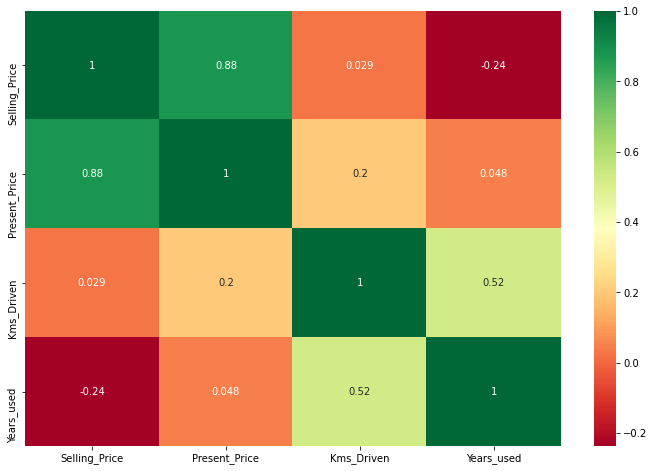

In [38]:

#get correlations of each features in dataset
corrmat = df[["Selling_Price",	"Present_Price",	"Kms_Driven",	"Years_used"]].corr()
top_corr_features = corrmat.index


plt.figure(figsize=(12,8))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## pairplot

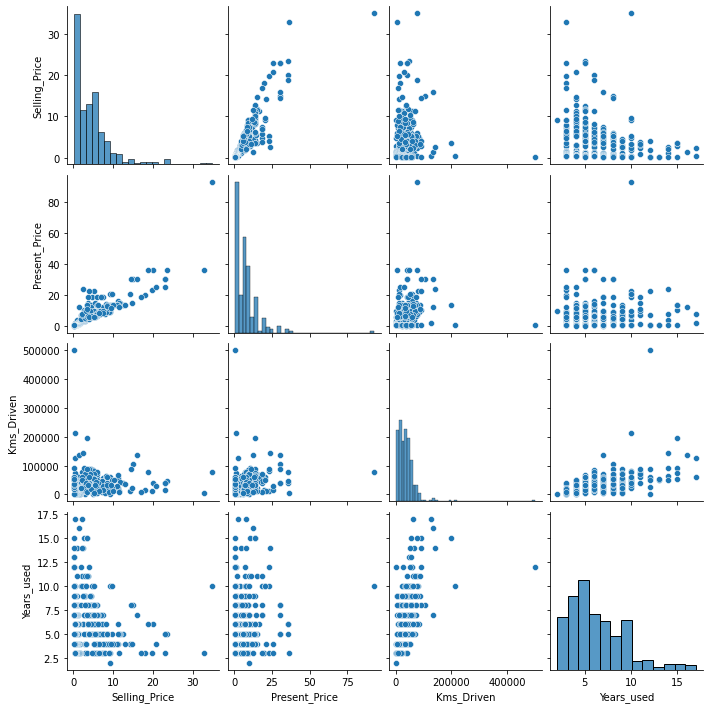

In [36]:
sns.pairplot(df[["Selling_Price",	"Present_Price",	"Kms_Driven",	"Years_used"]])

## Dealing with categorical variables using pd.get_dummies 


In [39]:
df =pd.get_dummies( df ,drop_first=True)
# Here if we have three variables, and we set drop_first = True 
# we will have two variable , and when both the variables are 0 they will represent the third variable as 1

df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


## Normalization

In [44]:
# from sklearn.preprocessing import MinMaxScaler 

# scaler = MinMaxScaler()

max_present_price = df["Present_Price"].max(axis = 0 ) 
min_present_price = df["Present_Price"].min(axis = 0 ) 

df["Present_Price"]= ( df["Present_Price"] - min_present_price ) / (  max_present_price - min_present_price) 

In [46]:

max_selling_price = df["Selling_Price"].max(axis = 0 ) 
min_selling_price = df["Selling_Price"].min(axis = 0 ) 

df["Selling_Price"]= ( df["Selling_Price"] - min_selling_price ) / (  max_selling_price - min_selling_price) 

In [47]:
max_kms_driven = df["Kms_Driven"].max(axis = 0 ) 
min_kms_driven = df["Kms_Driven"].min(axis = 0 ) 

df["Kms_Driven"]= ( df["Kms_Driven"] - min_kms_driven ) / (  max_kms_driven - min_kms_driven) 

In [48]:
max_years_used = df["Years_used"].max(axis = 0 ) 
min_years_used = df["Years_used"].min(axis = 0 ) 

df["Years_used"]= ( df["Years_used"] - min_years_used ) / (  max_years_used - min_years_used) 

In [49]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.093123,0.057109,0.053053,0,0.266667,0,1,0,1
1,0.133238,0.099913,0.085085,0,0.333333,1,0,0,1
2,0.204871,0.103273,0.012813,0,0.066667,0,1,0,1
3,0.078797,0.041504,0.009409,0,0.466667,0,1,0,1
4,0.128940,0.070980,0.083984,0,0.266667,1,0,0,1


In [52]:
meta_data = {
    
    "Normalization_Params" : {
        
        "max_present_price" : max_present_price, 
        "min_present_price" : min_present_price,

        "max_selling_price" : max_selling_price, 
        "min_selling_price" : min_selling_price,

        "max_kms_driven"    :  max_kms_driven ,
        "min_kms_driven"    :  min_kms_driven ,

        "max_years_used"    : max_years_used ,
        "min_years_used"    : min_years_used

    }
    
}

meta_data

{'Normalization_Params': {'max_kms_driven': 500000,
  'max_present_price': 92.6,
  'max_selling_price': 35.0,
  'max_years_used': 17,
  'min_kms_driven': 500,
  'min_present_price': 0.32,
  'min_selling_price': 0.1,
  'min_years_used': 2}}

# Saving the processed data 

In [53]:
df.to_csv("final_data.csv")

In [55]:
import pickle 

md = open('meta_data', 'wb')
pickle.dump(meta_data,  md)
md.close()
  